<a href="https://colab.research.google.com/github/Neha198996/heroku/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import sklearn

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [5]:
Geography=pd.get_dummies(X['Geography'])
Gender=pd.get_dummies(X['Gender'])

In [6]:
X=pd.concat([X,Geography,Gender], axis=1)

In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [8]:
X.drop(columns=['Geography','Gender'],inplace=True)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([Dense(128,activation='relu',kernel_initializer='he_normal'),
                  Dropout(0.2),
                  Dense(64,activation='sigmoid'),
                  Dropout(0.2),
                  Dense(32,activation='relu',kernel_initializer='he_normal'),
                  Dropout(0.2),
                  Dense(16,activation='sigmoid'),
                  Dropout(0.2),
                  Dense(8,activation='relu',kernel_initializer='he_normal'),
                  Dropout(0.2),
                  Dense(1,activation='sigmoid')])

NameError: name 'Dropout' is not defined

In [13]:
model.compile(optimizer='SGD',loss='mae',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.2648 - accuracy: 0.5775 - val_loss: 0.2128 - val_accuracy: 0.5419
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2163 - accuracy: 0.4836 - val_loss: 0.2077 - val_accuracy: 0.4794
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2131 - accuracy: 0.4909 - val_loss: 0.2054 - val_accuracy: 0.3681
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2114 - accuracy: 0.4833 - val_loss: 0.2038 - val_accuracy: 0.5188
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2105 - accuracy: 0.4913 - val_loss: 0.2028 - val_accuracy: 0.4419
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2098 - accuracy: 0.4848 - val_loss: 0.2032 - val_accuracy: 0.5281
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.4823 - val_loss: 0.2024 - val_accuracy: 0.4875
Epoch 

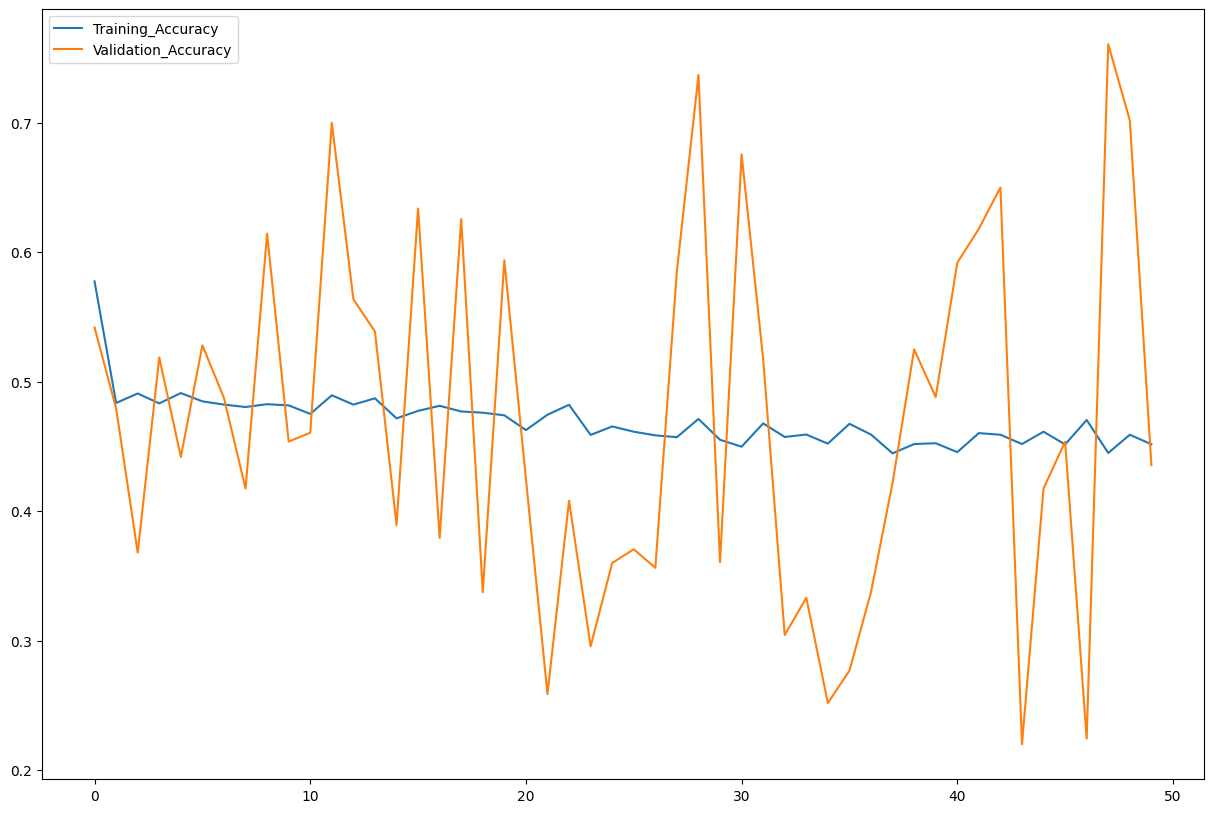

In [14]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
epochs=range(len(accuracy))
plt.figure(figsize=(15,10))
plt.plot(epochs,accuracy,label='Training_Accuracy')
plt.plot(epochs,val_accuracy,label='Validation_Accuracy')
plt.legend()


In [20]:
model.save('abc.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
model.load('abc.hdf5')

AttributeError: 'Sequential' object has no attribute 'load'